# 📊 Regression Evaluation Metrics Analysis

This notebook demonstrates comprehensive evaluation metrics for regression models.

**Metrics Covered:**
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R² Score (Coefficient of Determination)
- Adjusted R² Score
- Mean Absolute Percentage Error (MAPE)

## 1️⃣ Import Libraries

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error
)
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 2️⃣ Load the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('regression_dataset_799x17.csv')

# Display basic info
print(f"📊 Dataset Shape: {df.shape}")
print(f"📝 Number of Features: {df.shape[1] - 1}")
print(f"📈 Number of Samples: {df.shape[0]}")
print("\n🔍 First 5 rows:")
df.head()

📊 Dataset Shape: (799, 17)
📝 Number of Features: 16
📈 Number of Samples: 799

🔍 First 5 rows:


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,target
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,0.020584,0.969910,0.832443,0.212339,0.181825,0.183405,54.270125
1,0.304242,0.524756,0.431945,0.291229,0.611853,0.139494,0.292145,0.366362,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450,0.607545,0.170524,79.901037
2,0.065052,0.948886,0.965632,0.808397,0.304614,0.097672,0.684233,0.440152,0.122038,0.495177,0.034389,0.909320,0.258780,0.662522,0.311711,0.520068,3.625490
3,0.546710,0.184854,0.969585,0.775133,0.939499,0.894827,0.597900,0.921874,0.088493,0.195983,0.045227,0.325330,0.388677,0.271349,0.828738,0.356753,98.401815
4,0.280935,0.542696,0.140924,0.802197,0.074551,0.986887,0.772245,0.198716,0.005522,0.815461,0.706857,0.729007,0.771270,0.074045,0.358466,0.115869,45.490660


In [3]:
# Dataset info
print("📋 Dataset Information:")
print("="*50)
df.info()

📋 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   799 non-null    float64
 1   feature_2   799 non-null    float64
 2   feature_3   799 non-null    float64
 3   feature_4   799 non-null    float64
 4   feature_5   799 non-null    float64
 5   feature_6   799 non-null    float64
 6   feature_7   799 non-null    float64
 7   feature_8   799 non-null    float64
 8   feature_9   799 non-null    float64
 9   feature_10  799 non-null    float64
 10  feature_11  799 non-null    float64
 11  feature_12  799 non-null    float64
 12  feature_13  799 non-null    float64
 13  feature_14  799 non-null    float64
 14  feature_15  799 non-null    float64
 15  feature_16  799 non-null    float64
 16  target      799 non-null    float64
dtypes: float64(17)
memory usage: 106.2 KB


In [4]:
# Statistical summary
print("📊 Statistical Summary:")
df.describe()

📊 Statistical Summary:


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,target
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,0.507383,0.487836,0.479461,0.490102,0.494938,0.506124,0.496427,0.488010,0.495164,0.486963,0.501817,0.510701,0.483957,0.509040,0.510193,0.489905,49.383931
std,0.279594,0.287617,0.286501,0.287118,0.291501,0.289655,0.286874,0.287134,0.289048,0.291515,0.290401,0.287876,0.284937,0.281221,0.294082,0.294502,29.227319
min,0.003021,0.001112,0.000943,0.000053,0.000790,0.000227,0.000012,0.000031,0.000598,0.004360,0.000410,0.000158,0.000135,0.000243,0.000906,0.000241,0.133364
25%,0.268982,0.232133,0.222435,0.256964,0.246287,0.255223,0.247599,0.247786,0.243096,0.228820,0.247920,0.275680,0.238931,0.277787,0.247804,0.220691,23.700257
50%,0.512576,0.493342,0.475198,0.470785,0.482601,0.512689,0.501120,0.480560,0.498151,0.472215,0.484266,0.512883,0.483877,0.519612,0.511275,0.489561,48.190757
75%,0.744104,0.714649,0.708468,0.741374,0.750896,0.762469,0.739519,0.731375,0.729356,0.747134,0.762253,0.761919,0.730116,0.747564,0.767095,0.749098,74.717254
max,0.998560,0.999558,0.998348,0.999718,0.998698,0.999673,0.999207,0.999505,0.999414,0.998750,0.998893,0.999461,0.999350,0.998611,0.997934,0.998905,99.884483


In [5]:
# Check for missing values
print("❌ Missing Values:")
print(df.isnull().sum())

❌ Missing Values:
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
target        0
dtype: int64


## 3️⃣ Data Preparation

In [6]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

print(f"✅ Features shape: {X.shape}")
print(f"✅ Target shape: {y.shape}")
print(f"\n📊 Target Statistics:")
print(f"   Min: {y.min():.2f}")
print(f"   Max: {y.max():.2f}")
print(f"   Mean: {y.mean():.2f}")
print(f"   Std: {y.std():.2f}")

✅ Features shape: (799, 16)
✅ Target shape: (799,)

📊 Target Statistics:
   Min: 0.13
   Max: 99.88
   Mean: 49.38
   Std: 29.23


In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"✅ Training set size: {len(X_train)} samples")
print(f"✅ Testing set size: {len(X_test)} samples")

✅ Training set size: 639 samples
✅ Testing set size: 160 samples


## 4️⃣ Train Regression Models

In [8]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print("✅ Linear Regression model trained!")

# Train Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("✅ Random Forest Regressor model trained!")

✅ Linear Regression model trained!


✅ Random Forest Regressor model trained!


In [9]:
# Make predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

print("✅ Predictions generated for both models!")

✅ Predictions generated for both models!


## 5️⃣ Evaluation Metrics - Detailed Explanation

### 📌 Understanding Each Metric:

| Metric | Formula | Description |
|--------|---------|-------------|
| **MAE** | Mean(\|y - ŷ\|) | Average absolute difference between actual and predicted values |
| **MSE** | Mean((y - ŷ)²) | Average squared difference (penalizes larger errors more) |
| **RMSE** | √MSE | Square root of MSE (same unit as target) |
| **R²** | 1 - (SS_res/SS_tot) | Proportion of variance explained by the model |
| **Adjusted R²** | 1 - [(1-R²)(n-1)/(n-p-1)] | R² adjusted for number of predictors |
| **MAPE** | Mean(\|y - ŷ\|/\|y\|) × 100 | Error as a percentage of actual values |

In [10]:
# Function to calculate all regression metrics
def calculate_regression_metrics(y_true, y_pred, n_features, model_name):
    """
    Calculate comprehensive regression evaluation metrics.
    
    Parameters:
    -----------
    y_true : array-like
        Actual target values
    y_pred : array-like
        Predicted target values
    n_features : int
        Number of features used in the model
    model_name : str
        Name of the model for display
    
    Returns:
    --------
    dict : Dictionary containing all metrics
    """
    n = len(y_true)
    p = n_features
    
    # Calculate metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    
    metrics = {
        'Model': model_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R² Score': r2,
        'Adjusted R²': adjusted_r2,
        'MAPE (%)': mape
    }
    
    return metrics

print("✅ Metrics function defined!")

✅ Metrics function defined!


## 6️⃣ Calculate Metrics for Both Models

In [11]:
# Calculate metrics for Linear Regression
lr_metrics = calculate_regression_metrics(
    y_test, y_pred_lr, X_train.shape[1], 'Linear Regression'
)

# Calculate metrics for Random Forest
rf_metrics = calculate_regression_metrics(
    y_test, y_pred_rf, X_train.shape[1], 'Random Forest'
)

# Create comparison dataframe
metrics_df = pd.DataFrame([lr_metrics, rf_metrics])
metrics_df = metrics_df.set_index('Model')

print("\n" + "="*70)
print("📊 REGRESSION EVALUATION METRICS COMPARISON")
print("="*70)
print(metrics_df.to_string())
print("="*70)


📊 REGRESSION EVALUATION METRICS COMPARISON
                         MAE         MSE       RMSE  R² Score  Adjusted R²    MAPE (%)
Model                                                                                 
Linear Regression  25.166036  846.472101  29.094194  0.031236    -0.077157  437.470726
Random Forest      25.404533  870.730416  29.508142  0.003473    -0.108027  457.535697


In [12]:
# Styled display of metrics
print("\n" + "="*60)
print("📈 DETAILED METRICS BREAKDOWN")
print("="*60)

for model_name, metrics in [('Linear Regression', lr_metrics), ('Random Forest', rf_metrics)]:
    print(f"\n🔹 {model_name}:")
    print("-" * 40)
    print(f"   • MAE:          {metrics['MAE']:.4f}")
    print(f"   • MSE:          {metrics['MSE']:.4f}")
    print(f"   • RMSE:         {metrics['RMSE']:.4f}")
    print(f"   • R² Score:     {metrics['R² Score']:.4f}")
    print(f"   • Adjusted R²:  {metrics['Adjusted R²']:.4f}")
    print(f"   • MAPE:         {metrics['MAPE (%)']:.2f}%")


📈 DETAILED METRICS BREAKDOWN

🔹 Linear Regression:
----------------------------------------
   • MAE:          25.1660
   • MSE:          846.4721
   • RMSE:         29.0942
   • R² Score:     0.0312
   • Adjusted R²:  -0.0772
   • MAPE:         437.47%

🔹 Random Forest:
----------------------------------------
   • MAE:          25.4045
   • MSE:          870.7304
   • RMSE:         29.5081
   • R² Score:     0.0035
   • Adjusted R²:  -0.1080
   • MAPE:         457.54%


## 7️⃣ Metrics Visualization

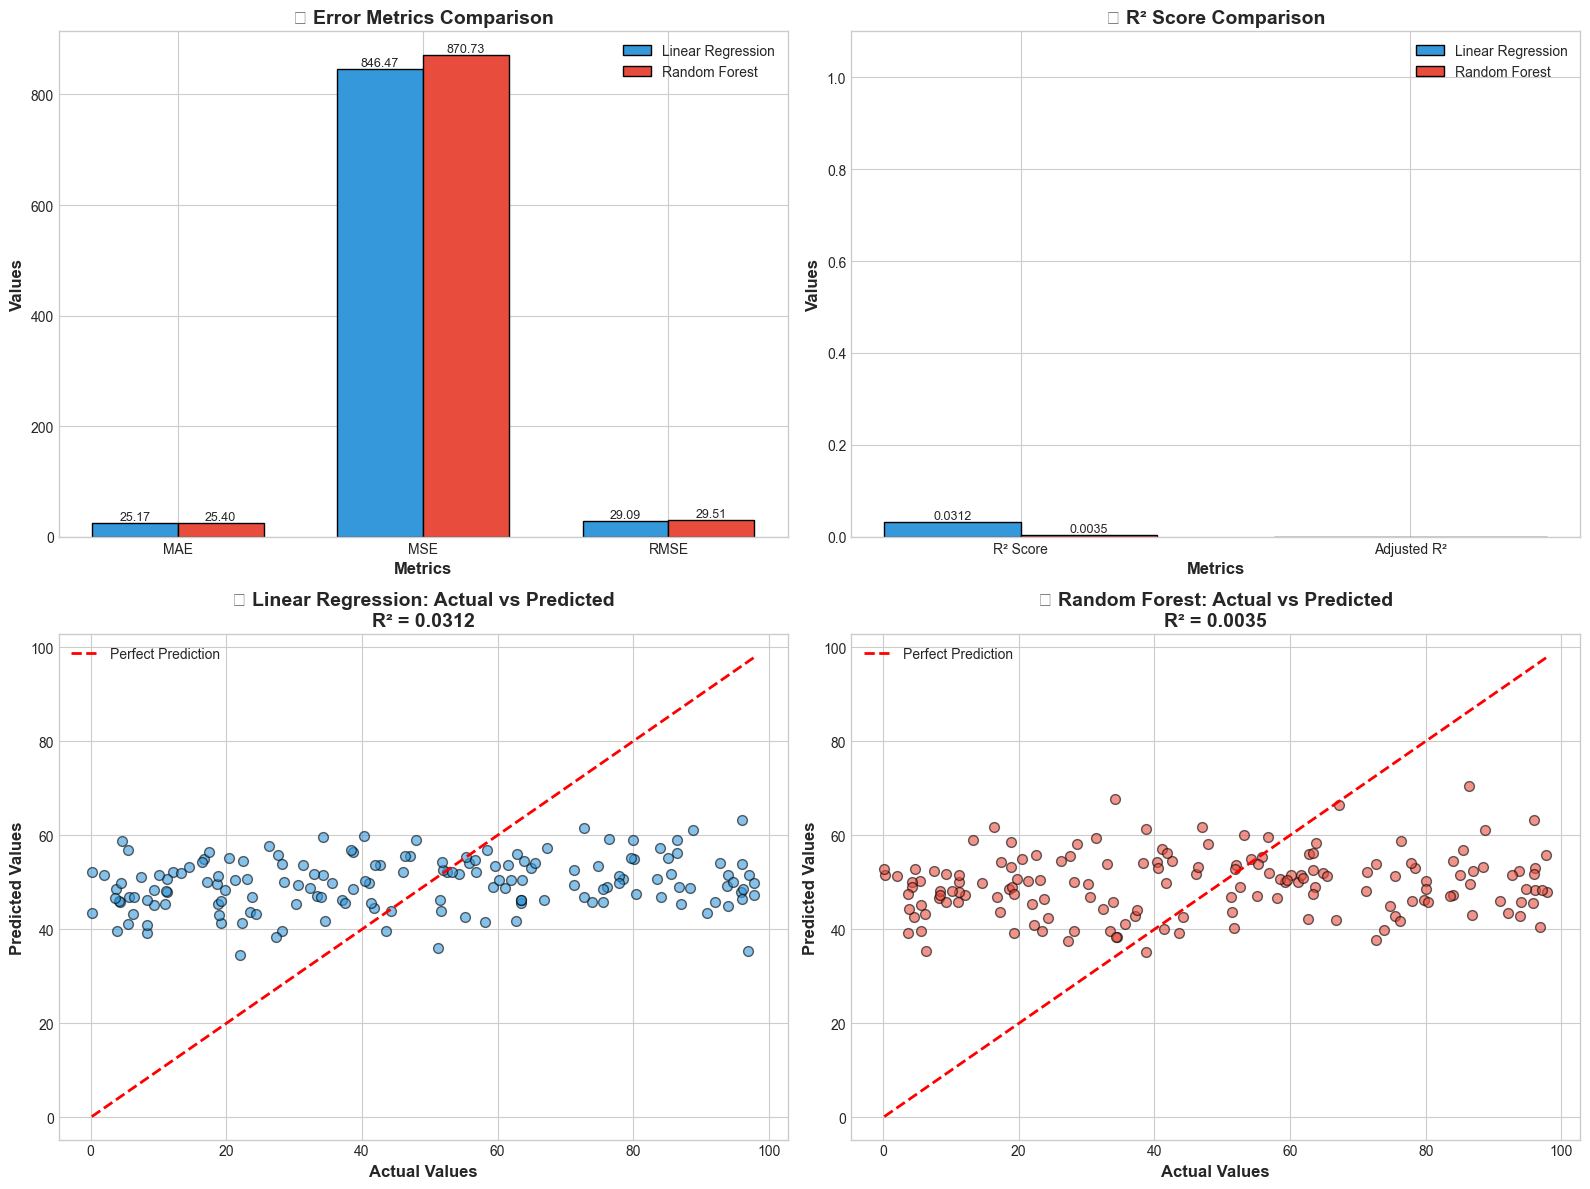


✅ Visualization saved as 'regression_metrics_visualization.png'


In [13]:
# Set style for plots
plt.style.use('seaborn-v0_8-whitegrid')
fig = plt.figure(figsize=(16, 12))

# Color palette
colors = ['#3498db', '#e74c3c']

# 1. Bar chart for error metrics (MAE, MSE, RMSE)
ax1 = fig.add_subplot(2, 2, 1)
error_metrics = ['MAE', 'MSE', 'RMSE']
x = np.arange(len(error_metrics))
width = 0.35

lr_values = [lr_metrics['MAE'], lr_metrics['MSE'], lr_metrics['RMSE']]
rf_values = [rf_metrics['MAE'], rf_metrics['MSE'], rf_metrics['RMSE']]

bars1 = ax1.bar(x - width/2, lr_values, width, label='Linear Regression', color=colors[0], edgecolor='black')
bars2 = ax1.bar(x + width/2, rf_values, width, label='Random Forest', color=colors[1], edgecolor='black')

ax1.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax1.set_ylabel('Values', fontsize=12, fontweight='bold')
ax1.set_title('📊 Error Metrics Comparison', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(error_metrics)
ax1.legend()
ax1.bar_label(bars1, fmt='%.2f', fontsize=9)
ax1.bar_label(bars2, fmt='%.2f', fontsize=9)

# 2. R² Score comparison
ax2 = fig.add_subplot(2, 2, 2)
r2_metrics = ['R² Score', 'Adjusted R²']
x2 = np.arange(len(r2_metrics))

lr_r2 = [lr_metrics['R² Score'], lr_metrics['Adjusted R²']]
rf_r2 = [rf_metrics['R² Score'], rf_metrics['Adjusted R²']]

bars3 = ax2.bar(x2 - width/2, lr_r2, width, label='Linear Regression', color=colors[0], edgecolor='black')
bars4 = ax2.bar(x2 + width/2, rf_r2, width, label='Random Forest', color=colors[1], edgecolor='black')

ax2.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax2.set_ylabel('Values', fontsize=12, fontweight='bold')
ax2.set_title('📈 R² Score Comparison', fontsize=14, fontweight='bold')
ax2.set_xticks(x2)
ax2.set_xticklabels(r2_metrics)
ax2.set_ylim(0, 1.1)
ax2.legend()
ax2.bar_label(bars3, fmt='%.4f', fontsize=9)
ax2.bar_label(bars4, fmt='%.4f', fontsize=9)

# 3. Actual vs Predicted - Linear Regression
ax3 = fig.add_subplot(2, 2, 3)
ax3.scatter(y_test, y_pred_lr, alpha=0.6, color=colors[0], edgecolor='black', s=50)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
ax3.set_xlabel('Actual Values', fontsize=12, fontweight='bold')
ax3.set_ylabel('Predicted Values', fontsize=12, fontweight='bold')
ax3.set_title(f'🔵 Linear Regression: Actual vs Predicted\nR² = {lr_metrics["R² Score"]:.4f}', fontsize=14, fontweight='bold')
ax3.legend()

# 4. Actual vs Predicted - Random Forest
ax4 = fig.add_subplot(2, 2, 4)
ax4.scatter(y_test, y_pred_rf, alpha=0.6, color=colors[1], edgecolor='black', s=50)
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
ax4.set_xlabel('Actual Values', fontsize=12, fontweight='bold')
ax4.set_ylabel('Predicted Values', fontsize=12, fontweight='bold')
ax4.set_title(f'🔴 Random Forest: Actual vs Predicted\nR² = {rf_metrics["R² Score"]:.4f}', fontsize=14, fontweight='bold')
ax4.legend()

plt.tight_layout()
plt.savefig('regression_metrics_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualization saved as 'regression_metrics_visualization.png'")

## 8️⃣ Residual Analysis

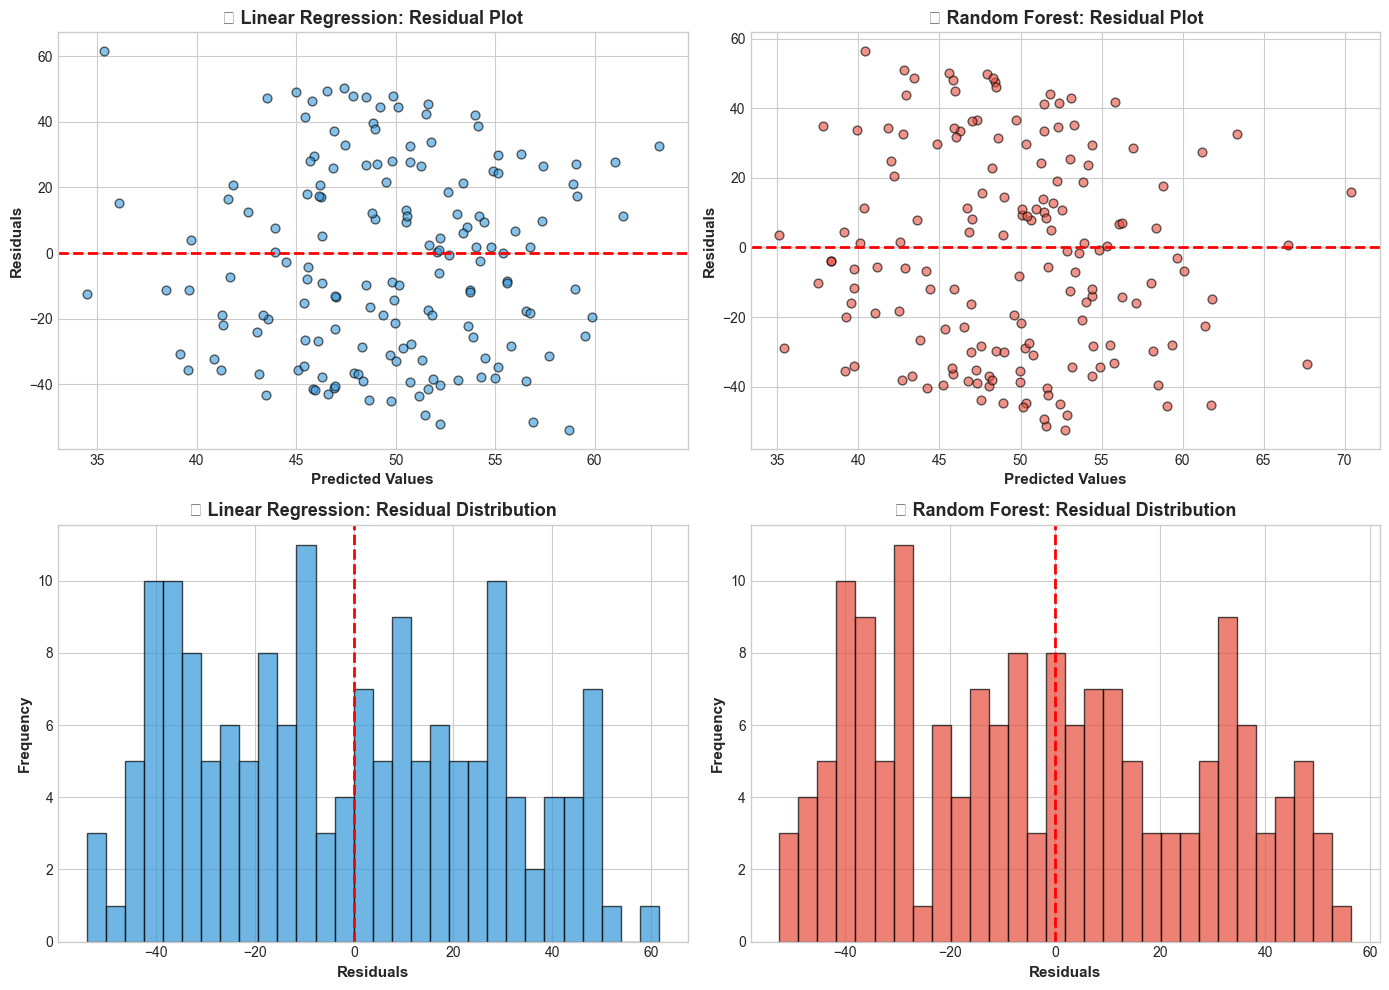


✅ Residual analysis visualization saved as 'residual_analysis.png'


In [14]:
# Calculate residuals
residuals_lr = y_test - y_pred_lr
residuals_rf = y_test - y_pred_rf

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Residual plot - Linear Regression
axes[0, 0].scatter(y_pred_lr, residuals_lr, alpha=0.6, color='#3498db', edgecolor='black', s=40)
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Predicted Values', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Residuals', fontsize=11, fontweight='bold')
axes[0, 0].set_title('🔵 Linear Regression: Residual Plot', fontsize=13, fontweight='bold')

# Residual plot - Random Forest
axes[0, 1].scatter(y_pred_rf, residuals_rf, alpha=0.6, color='#e74c3c', edgecolor='black', s=40)
axes[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted Values', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Residuals', fontsize=11, fontweight='bold')
axes[0, 1].set_title('🔴 Random Forest: Residual Plot', fontsize=13, fontweight='bold')

# Residual distribution - Linear Regression
axes[1, 0].hist(residuals_lr, bins=30, color='#3498db', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Residuals', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1, 0].set_title('🔵 Linear Regression: Residual Distribution', fontsize=13, fontweight='bold')

# Residual distribution - Random Forest
axes[1, 1].hist(residuals_rf, bins=30, color='#e74c3c', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Residuals', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1, 1].set_title('🔴 Random Forest: Residual Distribution', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.savefig('residual_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Residual analysis visualization saved as 'residual_analysis.png'")

## 9️⃣ Feature Importance (Random Forest)

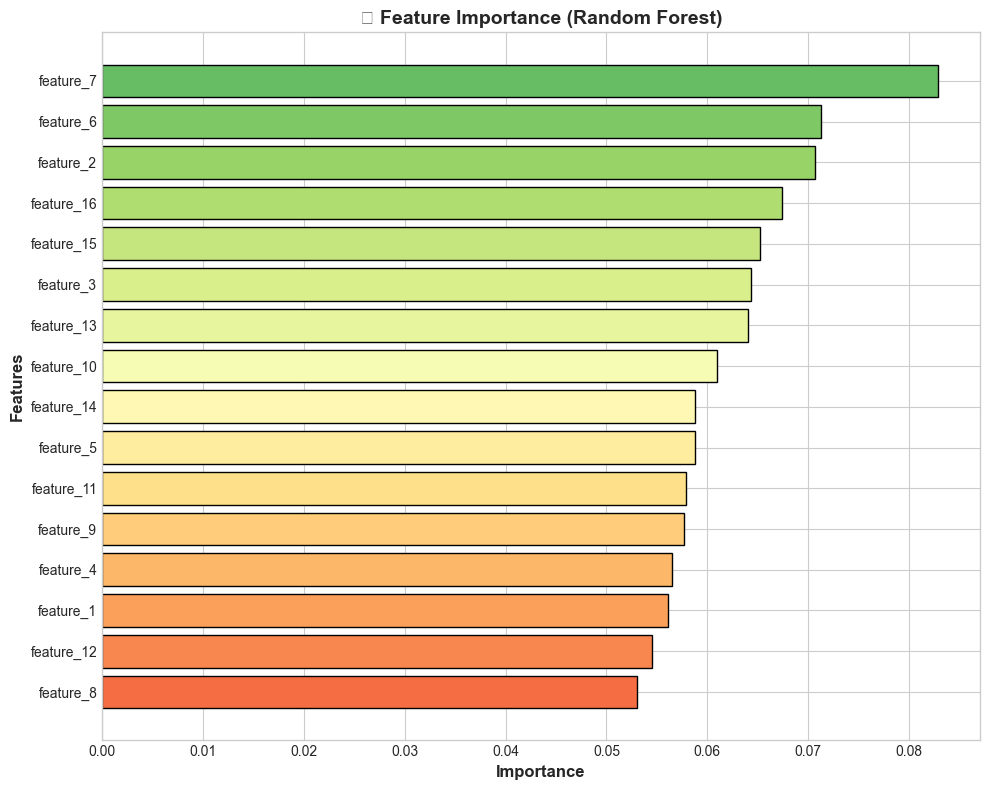


✅ Feature importance visualization saved as 'feature_importance.png'

📊 Top 5 Most Important Features:
   Feature  Importance
feature_15    0.065191
feature_16    0.067368
 feature_2    0.070721
 feature_6    0.071248
 feature_7    0.082900


In [15]:
# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=True)

# Plot feature importance
plt.figure(figsize=(10, 8))
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(feature_importance)))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color=colors, edgecolor='black')
plt.xlabel('Importance', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('📊 Feature Importance (Random Forest)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Feature importance visualization saved as 'feature_importance.png'")
print("\n📊 Top 5 Most Important Features:")
print(feature_importance.tail(5).to_string(index=False))

## 🔟 Final Summary

In [16]:
# Final summary
print("\n" + "="*70)
print("📊 REGRESSION EVALUATION METRICS - FINAL SUMMARY")
print("="*70)
print("\n📌 Dataset Information:")
print(f"   • Total Samples: {len(df)}")
print(f"   • Features: {len(X.columns)}")
print(f"   • Training Samples: {len(X_train)}")
print(f"   • Testing Samples: {len(X_test)}")

print("\n📈 Model Performance Comparison:")
print(metrics_df.round(4).to_string())

# Determine best model
best_mae = 'Linear Regression' if lr_metrics['MAE'] < rf_metrics['MAE'] else 'Random Forest'
best_r2 = 'Linear Regression' if lr_metrics['R² Score'] > rf_metrics['R² Score'] else 'Random Forest'

print("\n🏆 Best Performing Model:")
print(f"   • Lowest MAE: {best_mae}")
print(f"   • Highest R²: {best_r2}")

print("\n📋 Metrics Interpretation Guide:")
print("   • MAE: Lower is better (average error magnitude)")
print("   • MSE: Lower is better (penalizes large errors)")
print("   • RMSE: Lower is better (same unit as target)")
print("   • R² Score: Higher is better (0-1, variance explained)")
print("   • Adjusted R²: Higher is better (accounts for features)")
print("   • MAPE: Lower is better (percentage error)")

print("\n" + "="*70)
print("✅ ANALYSIS COMPLETE!")
print("="*70)


📊 REGRESSION EVALUATION METRICS - FINAL SUMMARY

📌 Dataset Information:
   • Total Samples: 799
   • Features: 16
   • Training Samples: 639
   • Testing Samples: 160

📈 Model Performance Comparison:
                       MAE       MSE     RMSE  R² Score  Adjusted R²  MAPE (%)
Model                                                                         
Linear Regression  25.1660  846.4721  29.0942    0.0312      -0.0772  437.4707
Random Forest      25.4045  870.7304  29.5081    0.0035      -0.1080  457.5357

🏆 Best Performing Model:
   • Lowest MAE: Linear Regression
   • Highest R²: Linear Regression

📋 Metrics Interpretation Guide:
   • MAE: Lower is better (average error magnitude)
   • MSE: Lower is better (penalizes large errors)
   • RMSE: Lower is better (same unit as target)
   • R² Score: Higher is better (0-1, variance explained)
   • Adjusted R²: Higher is better (accounts for features)
   • MAPE: Lower is better (percentage error)

✅ ANALYSIS COMPLETE!
